# Solution for "D&D.Sci September 2022: The Allocation Helm"

Source: https://www.lesswrong.com/posts/DKDDT8hGCTz8AxBQF/d-and-d-sci-september-2022-the-allocation-helm

List of D&D.Sci tasks: https://www.lesswrong.com/posts/6QfatwCcmuaDBNeDv/d-and-d-sci-scenario-index

> D&D.Sci September 2022: The Allocation Helm
>
> by abstractapplic
> 16th Sep 2022
>
> This is an entry in the 'Dungeons & Data Science' series, a set of puzzles where players are given a dataset to analyze and an objective to pursue using information from that dataset.
>
> You are the Allocation Helm, a piece of magical headwear employed at Swineboils College of Spellcraft and Sorcery. Your purpose is to read the minds of incoming students, and use the information you glean to Allocate them between the school’s four Houses: Dragonslayer, Thought-Talon, Serpentyne and Humblescrumble.
>
> You’ve . . . not been doing a terribly good job lately. You were impressively competent at assigning students when newly enchanted, but over the centuries your skill and judgement have steadily unraveled, to the point where your Allocations over the most recent decade have been completely random.
>
> Houses have begun to lose their character, *Ofspev* ratings have plummeted, and applications have declined precipitously. There is serious talk of Swineboils being shut down. Under these circumstances, the Headmistress has been moved to desperate action, and performed a Forbidden Ritual to temporarily restore your former brilliance.
>
> This boost will only last you for one Allocation, so you intend to make it count. Using the [records](https://raw.githubusercontent.com/H-B-P/d-and-d-sci-sep-2022/main/dset.csv) of past years’ readings and ratings, you hope to raise this class’ average score to match or exceed the glory of yore. (And if you do well enough, you might even be able to convince the Headmistress to keep performing rituals . . .)
>
> There are [twenty incoming students](https://raw.githubusercontent.com/H-B-P/d-and-d-sci-sep-2022/main/incoming_class.csv) this year. You may place them however you wish. Who goes where?
>
> *Ofspev - The Oracle for Spellcaster Evaluations, who predicts a quantitative measure of the lifetime impact each student will have on the world shortly after they’re Allocated. (No-one knows how to make him predict anything else, or predict at any other time, or stop predicting, or be affected by the passage of time.)*

## 1. Exploration and analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('source/dset.csv')
print(data.info(), '\n')
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     20379 non-null  int64 
 1   Intellect      20379 non-null  int64 
 2   Integrity      20379 non-null  int64 
 3   Courage        20379 non-null  int64 
 4   Reflexes       20379 non-null  int64 
 5   Patience       20379 non-null  int64 
 6   House          20379 non-null  object
 7   Ofstev Rating  20379 non-null  int64 
 8   Year           20379 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.4+ MB
None 

         Unnamed: 0     Intellect     Integrity       Courage      Reflexes  \
count  20379.000000  20379.000000  20379.000000  20379.000000  20379.000000   
mean   10190.000000     32.531478     32.628196     32.507974     32.690711   
std     5883.054904     16.057066     16.099147     15.942373     16.063804   
min        1.000000      1.000000      1.00000

,Unnamed: 0,Intellect,Integrity,Courage,Reflexes,Patience,House,Ofstev Rating,Year
0,1,64,12,11,45,21,Serpentyne,26,1511
1,2,58,54,15,24,34,Humblescrumble,40,1511
2,3,48,44,32,23,58,Serpentyne,34,1511
3,4,28,28,13,25,67,Serpentyne,24,1511
4,5,33,38,28,28,33,Dragonslayer,36,1511


In [3]:
del data[data.columns[0]]
data.rename(columns = {'Ofstev Rating': 'Rating'}, inplace = True)

data.groupby('House').agg( 
    total_students = ('House', 'count'),
    avg_intellect = ('Intellect', 'mean'),
    avg_integrity = ('Integrity', 'mean'),
    avg_courage = ('Courage', 'mean'),
    avg_reflexes = ('Reflexes', 'mean'),
    avg_patience = ('Patience', 'mean'),
    avg_rating = ('Rating', 'mean'),
).reset_index()

,House,total_students,avg_intellect,avg_integrity,avg_courage,avg_reflexes,avg_patience,avg_rating
0,Dragonslayer,6210,29.363446,32.060709,40.339614,36.237359,31.383253,26.816103
1,Humblescrumble,5203,27.930233,38.862387,27.564674,28.601768,29.838939,23.436479
2,Serpentyne,4825,35.218031,27.969948,27.508187,38.404767,33.705699,26.477513
3,Thought-Talon,4141,39.933349,31.073895,32.800048,25.851727,35.952427,27.163246


In [4]:
houses = ['Thought-Talon', 'Serpentyne', 'Dragonslayer', 'Humblescrumble']
stats = ['Intellect', 'Integrity', 'Courage', 'Reflexes', 'Patience']
indicators = stats + ['Rating']

**Observations (#1)**
- There are 5 stats ranging from 1 to 80
- Ofstev Rating ranges from 0 to 78
- Data available goes all the way from the year 1511 to 2021
- The top house, based on average rating, is Though-Talon, followed by Dragonslayer, Serpentyne, and finally Humblescrumble.

### Distributions

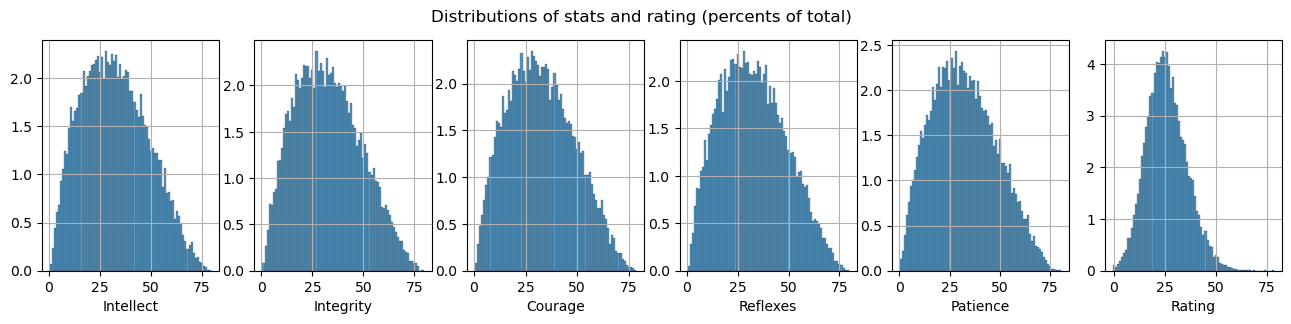

In [5]:
plt.figure(figsize=(16,3))
plt.suptitle("Distributions of stats and rating (percents of total)")
for i in range(len(indicators)):
    plt.subplot(1,len(indicators), i+1)
    sns.histplot(data, x=indicators[i], discrete=True, stat = 'percent')
    plt.gca().set_ylabel("")
    plt.grid()
plt.show()

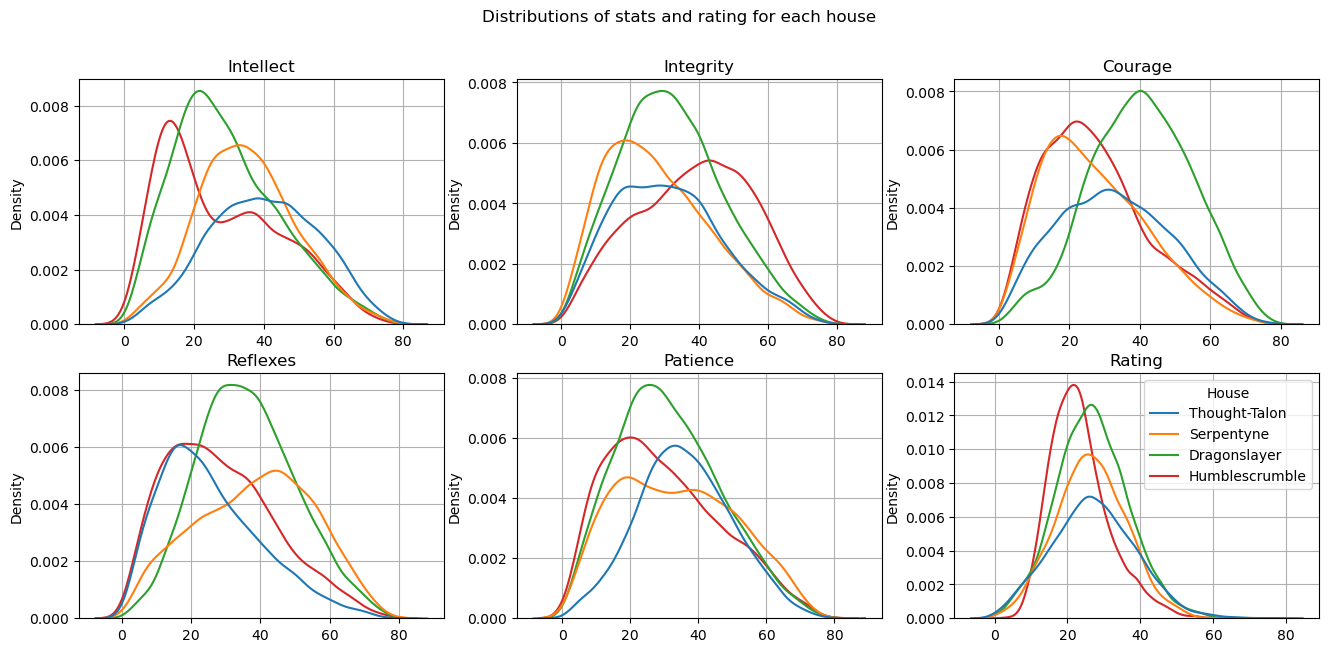

In [6]:
plt.figure(figsize=(16,7))
plt.suptitle("Distributions of stats and rating for each house")
for i in range(len(indicators)):
    indicator_name = indicators[i]
    plt.subplot(2,3, i+1)
    sns.kdeplot(data, x=indicator_name, hue='House',hue_order=houses, legend=(i==5))
    plt.title(indicator_name)
    plt.gca().set_xlabel(""); plt.grid()
plt.show()

**Observations (#2)**
- The overall distributions of stats are bell-shaped and slightly skewed to the right, with modes around 27.
- The overall rating distribution is even closer to normal, with a mode around 24 and a slight skew to the right.
- The distributions of stats for distinct houses differ, presumably due to allocation preferences. For example, on average, students of Thought-Talon tend to have higher Intellect but lower Reflexes than students of other houses.

### Relationships between variables

Let's examine how the indicators, including the rating, correlate with each other.

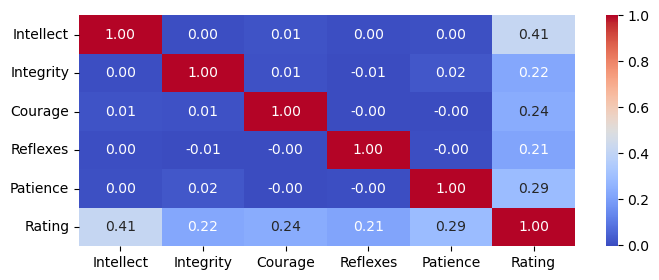

In [7]:
heatmap_kwargs = {'annot':True, 'fmt': '.2f', 'cmap':'coolwarm', 'cbar':True}

plt.figure(figsize=(8,3))
sns.heatmap(data[indicators].corr(), **heatmap_kwargs)
plt.show()

**Observations (#3)**
- Very minimal, or even nonexistent, correlation between the original stats.
- There is a relatively high correlation between each stat and the rating. Stats are sorted in descending order of their effect on the rating: Intellect, Patience, Courage, Integrity, and Reflexes.

The next step is to examine these correlations separately for each house.

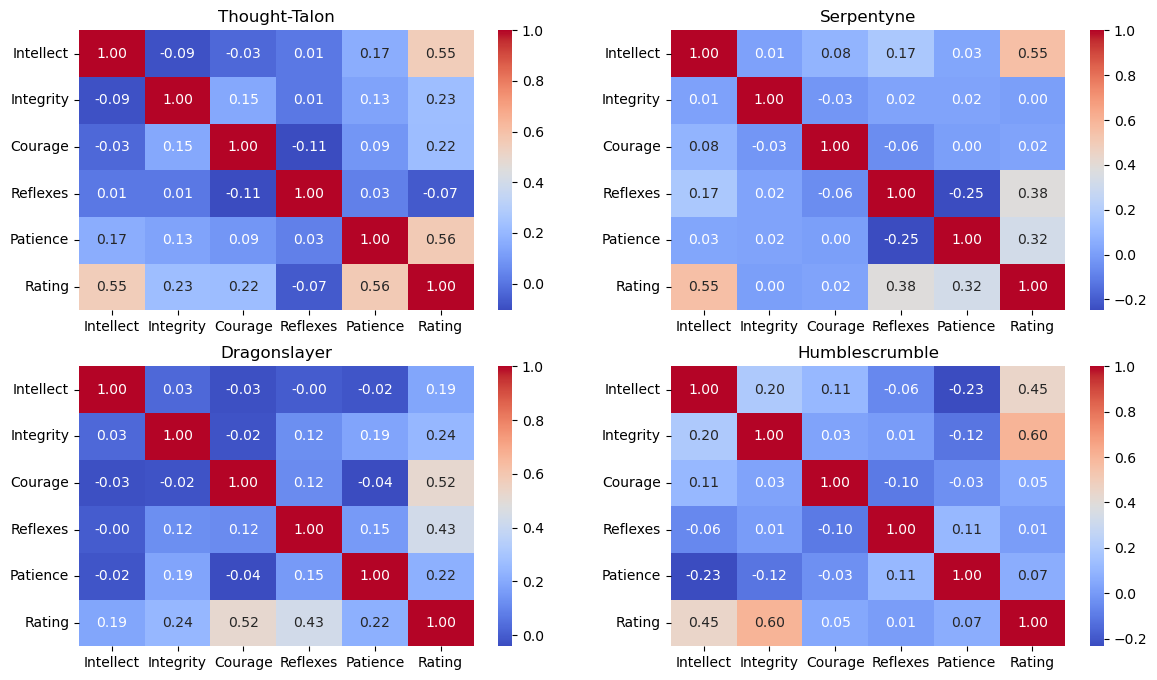

In [8]:
plt.figure(figsize = (14, 8))
for i_house in range(4):
    corr_matrix = data[data['House'] == houses[i_house]][indicators].corr()
    plt.subplot(2, 2, i_house + 1)
    sns.heatmap(corr_matrix, **heatmap_kwargs)
    plt.title(houses[i_house])

plt.show()

**Observations (#4)**
- There are some moderately correlated stat pairs within houses, presumably related to the allocation process.
    - For example, there is a negative correlation (-0.25) between Patience and Reflexes in Serpentyne, as well as between Patience and Intellect in Humblescrumble.
    - There is also a negative correlation between Patience and Intellect in Humblescrumble, and positive correlation between Intellect and Integrity.
- Within a specific house, there are also pronounced correlations between different stats and the rating.
    - In Thought-Talon, Intellect and Patience strongly correlate with the rating, while Integrity and Courage have a moderate correlation with the rating.
    - In Dragonslayer, the strong correlators are Courage and Reflexes, while all other stats have a moderate effect on the rating.
    - n Serpentyne, the strong correlator is Intellect, the moderate correlators are Reflexes and Patience, while Integrity and Courage do not affect the rating at all.
    - In Humblescrumble, Integrity and Intellect have a strong effect on the rating, while the other three stats do not correlate with it.

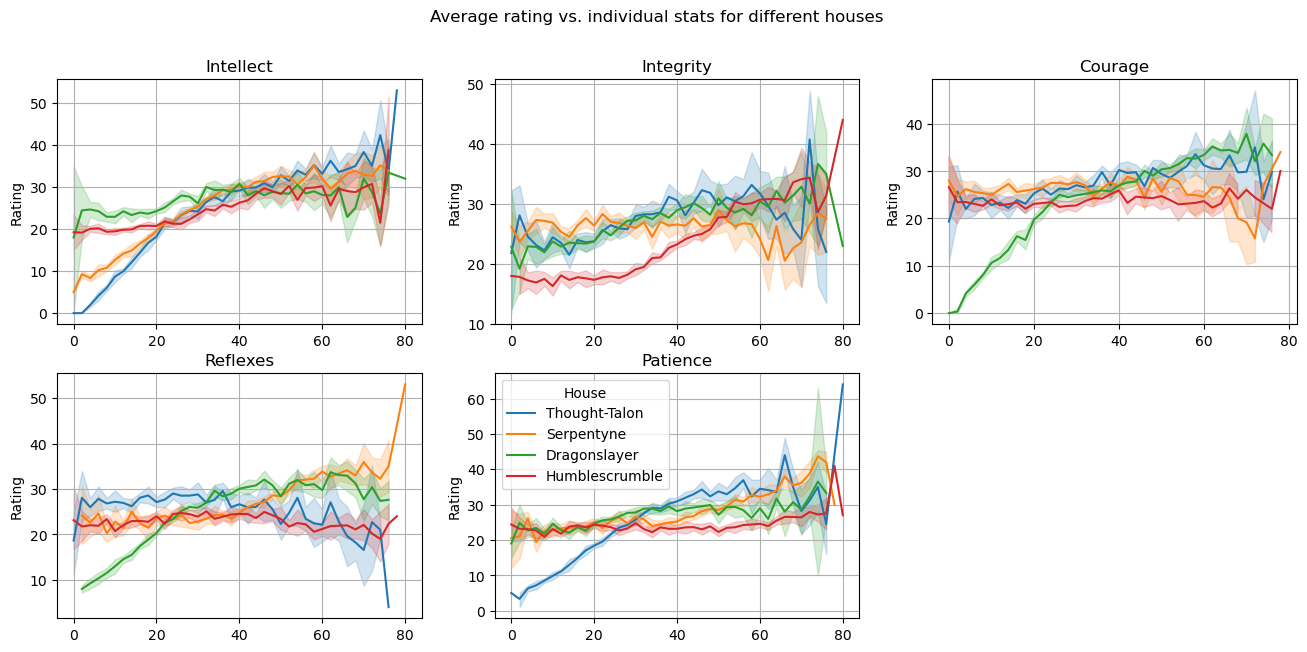

In [9]:
plt.figure(figsize=(16,7))
plt.suptitle('Average rating vs. individual stats for different houses')
for i in range(5):
    indicator = stats[i]
    plt.subplot(2,3,i+1)
    sns.lineplot(
        data = data,
        x = data[indicator].apply(lambda x: round(x/2)*2), # x = indicator,
        y = 'Rating',
        hue = 'House',
        hue_order = houses,
        legend = i==4
    )
    plt.grid(); plt.title(indicator); plt.gca().set_xlabel("")

plt.show()

**Observations (#5)**
- Every stat has a specific house (or several houses) where it is a very bad choice when the stat is low.
    - For Intellect, these houses are Serpentyne and Thought-Talon (below 20-25).
    - For Integrity, it is Humblescrumble (below ~50).
    - For Courage and Reflexes, it is Dragonslayer (both below 20-25).
    - For Patience, it is Thought-Talon (below 25-30).
- Higher values of stats provide a picture that is less precise but still worth mentioning.
    - Intellect: in the range of 40-50, Serpentyne performs best, but Thought-Talon appears to be better to the right of this range.
    - Integrity: at 40-60 Thought-Talon seems to win, then it is Dragonslayer and Humblescrumble
    - Courage: at 30-50 Thought-Talon wins, then Dragonslayer
    - Reflexes: at 40-50 Dragonslayer wins, then Serpentyne
    - Patience: at 30-70 Thought-Talon wins, after that it seems that Serpentyne is better.

### Time dependence

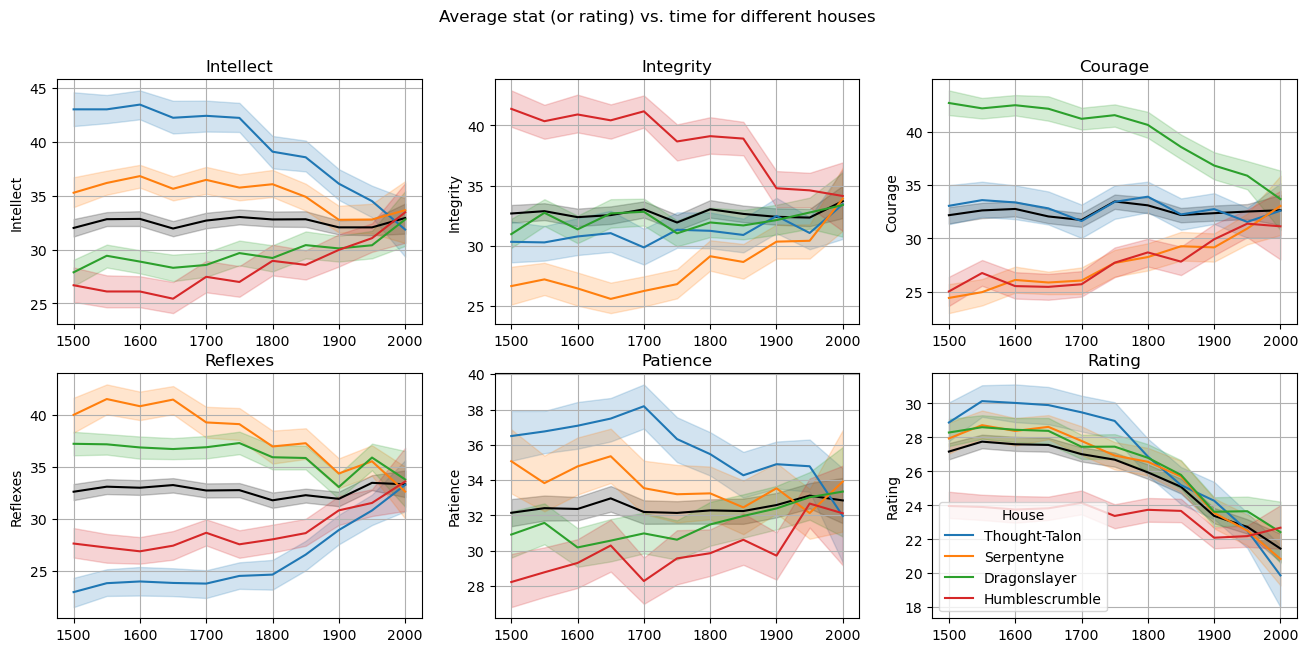

In [10]:
from math import floor

data['century'] = data['Year'].apply(lambda x: floor(x/100)*100 )

plt.figure(figsize=(16,7))
plt.suptitle('Average stat (or rating) vs. time for different houses')
for i in range(6):    
    plt.subplot(2,3,i+1)
    sns.lineplot(data, x=data['Year'].apply(lambda x: floor(x/50)*50 ), y=indicators[i], color='black')
    sns.lineplot(data, x=data['Year'].apply(lambda x: floor(x/50)*50 ), y=indicators[i], hue='House', hue_order = houses, legend = i==5)
    plt.title(indicators[i]); plt.gca().set_xlabel(""); plt.grid()

plt.show()


**Observations (#6)**
- The best results with respect to rating correspond to the period 1550 - 1700. At this period different houses differentiate the most with respect to average stats of their students. 
- 2000s correspond to the allocation that is closest to random.
- Historical differentiation for each stat (during the "golden age", 1550-1700), in descending order:
    - Intellect: Thought-Talon > Serpentyne > Average > Dragonslayer > Humblescrumble
    - Integrity: Humblescrumble > Average >= Dragonslayer > Thought-Talon > Serpentyne
    - Courage: Dragonslayer > Thought-Talon >= Average > Humblescrumble = Serpentyne
    - Reflexes: Serpentyne > Dragonslayer > Average > Humblescrumble > Thought-Talon
    - Patience: Thought-Talon > Serpentyne > Average > Dragonslayer > Humblescrumble
    - **Rating**: Thought-Talon > Serpentyne = Dragonslayer > Average > Humblescrumble

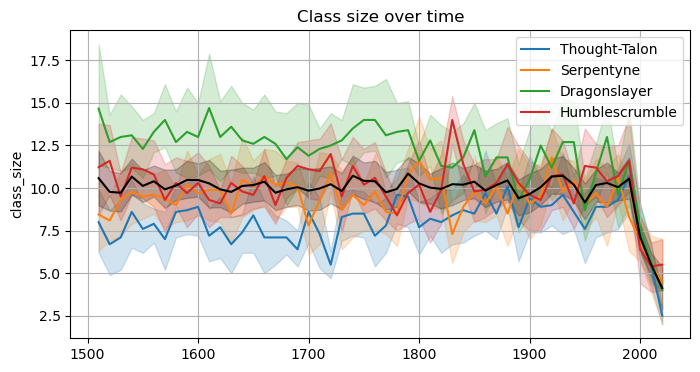

In [11]:
data_classes = data.groupby(['Year', 'House', 'century']).agg(
    class_size = ('House', 'count'),
    avg_Rating = ('Rating', 'mean'),
    avg_Intellect = ('Intellect', 'mean'),
    avg_Integrity = ('Integrity', 'mean'),
    avg_Courage = ('Courage', 'mean'),
    avg_Reflexes = ('Reflexes', 'mean'),
    avg_Patience = ('Patience', 'mean'),
).reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data_classes, x=data_classes['Year'].apply(lambda x: floor(x/10)*10), y='class_size', hue='House', hue_order = houses)
sns.lineplot(data_classes, x=data_classes['Year'].apply(lambda x: floor(x/10)*10), y='class_size', color='black')
plt.grid(); plt.title('Class size over time'); plt.gca().set_xlabel(""); plt.show()

**Observations (#7)**
- Class sizes drop rapidly after the year 2000.
- Historically Dragonslayer had the biggest classes, while Thought-Talon - the smallest.

### Effect of class size and classmates' stats

**Hypothesis #1.** Class sizes could effect individual ratings

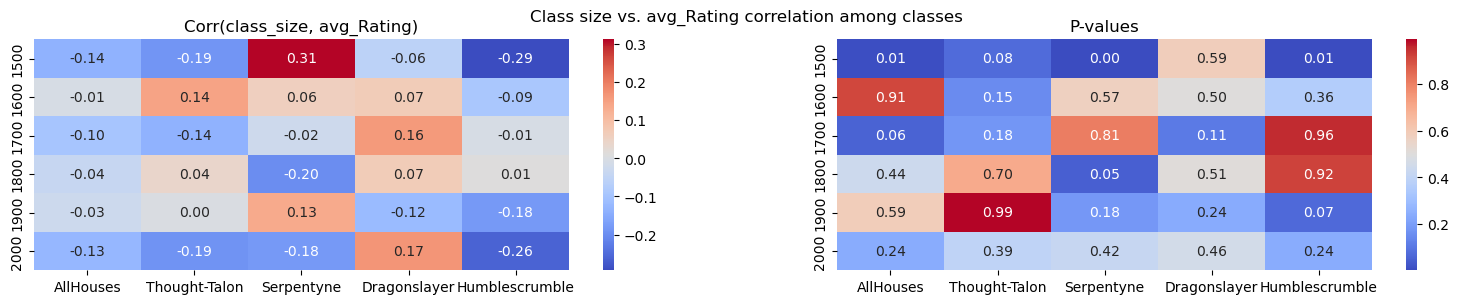

In [12]:
from scipy.stats import pearsonr

res, res_pval = [], []
centuries = data_classes['century'].unique()

for century in centuries:
    subres, subres_pval = {}, {}
    century_subsample = data_classes[data_classes['century']==century]
    subres['AllHouses'], subres_pval['AllHouses'] = pearsonr( century_subsample['avg_Rating'], century_subsample['class_size'] )
    for house in houses:
        subsample = century_subsample[ century_subsample['House']==house ]
        subres[house], subres_pval[house] = pearsonr( subsample['avg_Rating'], subsample['class_size'] )
    res.append(subres)
    res_pval.append(subres_pval)

corr_matrix = pd.DataFrame(res, index=centuries)
pval_matrix = pd.DataFrame(res_pval, index=centuries)

plt.figure(figsize = (19,3))
plt.suptitle("Class size vs. avg_Rating correlation among classes")

plt.subplot(1,2,1)
sns.heatmap(corr_matrix, **heatmap_kwargs)
plt.title('Corr(class_size, avg_Rating)')

plt.subplot(1,2,2)
sns.heatmap(pval_matrix, **heatmap_kwargs)
plt.title('P-values')

plt.show()

**Observations (#8)**
- Statistically significant correlations of class size with average rating correspond to periods 1800s and earlier. Lowest p-values correspond to 1500s, during this period the allocation process underwent some changes (at least we can see that average rating grew from 1500s to 1550s). These changes may be the reason of such strong correlation.
- During more stable periods the only statistically significan correlation (on the edge of statistical significance) corresonds to Serpentyne in 1800s. This could be random, especially given that this is the only threshold p-value amongh 15 other independent p-values (in total 4 periods 1600s - 1900s, and 4 houses).

**Conclusion #1**
- We could not find definitive indications that class size directly effects individual rating. From no on I will base my analysis on the hypothesis that class size only effects rating indirectly through allocation process.

Let's also study correlations of individually calculated values (other classmates' averaged indicators). The most informative period is when the allocation process is the most random, (i.e. 2000s).

In [13]:
data['class_size'] = data.groupby(['Year', 'House'])['House'].transform('count')

for indicator in ['Rating'] + indicators:
    data[f'class_total_{indicator}'] = data.groupby(['Year', 'House'])[indicator].transform('sum')
    data[f'classmates_avg_{indicator}'] = (data[f'class_total_{indicator}']-data[indicator]) / (data['class_size']-1)
    del data[f'class_total_{indicator}']

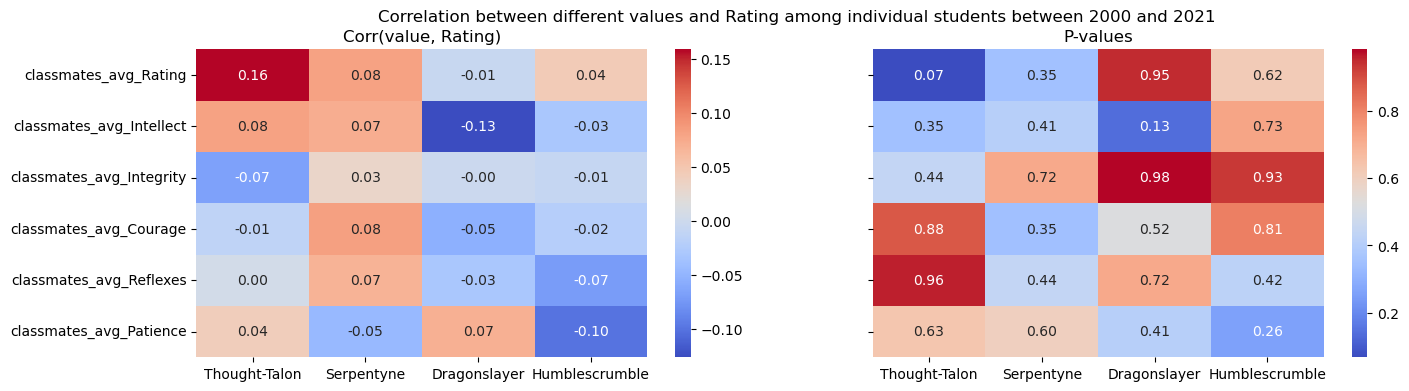

In [14]:
values = ['classmates_avg_Rating'] + [f'classmates_avg_{stat}' for stat in stats]
period_subsample = data[data['century'] == 2000].dropna()

res, res_pval = [], []

for value in values:

    subres, subres_pval = {}, {}
    for house in houses:
        subsample = period_subsample[ period_subsample['House']==house ]
        subres[house], subres_pval[house] = pearsonr( subsample['Rating'], subsample[value] )
    res.append(subres)
    res_pval.append(subres_pval)

corr_matrix = pd.DataFrame(res, index = values)
pval_matrix = pd.DataFrame(res_pval, index = values)

plt.figure(figsize = (16,4))
plt.suptitle(f"Correlation between different values and Rating among individual students between 2000 and 2021")

plt.subplot(1,2,1)
sns.heatmap(corr_matrix, **heatmap_kwargs)
plt.title(f'Corr(value, Rating)')

plt.subplot(1,2,2)
sns.heatmap(pval_matrix, **heatmap_kwargs)
plt.gca().set_yticklabels([])
plt.title('P-values')

plt.show()

**Observation (#9)**
- It seems that in 2000s (when allocation was closest to random), classmates' averaged values do not effect individual rating.

**Conclusion #2**
- We could not find definitive indications that classmates' averaged rating or any original stat directly effect individual rating. From no on I will base my analysis on the hypothesis that they don't directly effect it.

## 2. Allocation based on analysis of nearest neighbors

In [15]:
candidates = pd.read_csv('source/incoming_class.csv')

print(candidates)

   Student  Intellect  Integrity  Courage  Reflexes  Patience  Year
0        A         34         52       46        18        33  2022
1        B         22         13       19        10        25  2022
2        C         33         11       18        46        46  2022
3        D          6         21       47        17        23  2022
4        E         19         33       38         9        17  2022
5        F         48          6       33        30        54  2022
6        G         17         10       39        54        32  2022
7        H         39         20       52        16         6  2022
8        I          9         11        6        30        25  2022
9        J         50         27        7        11        30  2022
10       K         28         16       35        37        29  2022
11       L          9         28       23        43        53  2022
12       M         17         25       36        21        65  2022
13       N         11         26       34       

The main idea is to find a group of students with the closest vectors of stats within each house for each candidate and compare the average ratings of these groups. The proximity between two vectors will be measured using the Manhattan distance.

It is important to note that the group of nearest neighbors can be biased, as their average stats might significantly differ from those of the candidate. To address this bias, I will use linear regression on the vectors of delta_X values, where X represents one of the five original stats, and delta_X is the difference between the value of this stat for a student in the group of nearest neighbors and the value of this stat for the candidate.

In [16]:
from sklearn.neighbors import NearestNeighbors

def get_neighbors(df, max_neighbors = 100):

    res = []
    for house in houses:
        df_subsample = df[df['House']==house]
        X = df_subsample[stats]
        y = candidates[stats]
        nbrs = NearestNeighbors(n_neighbors=max_neighbors, p=1).fit(X)

        distances, indices = nbrs.kneighbors(y)
        for i_candidate in range(candidates.shape[0]):
            candidate_record = candidates.iloc[i_candidate]
            df_neighbors = df_subsample.iloc[indices[i_candidate]].copy()
            df_neighbors['candidate'] = candidate_record['Student']
            df_neighbors['distance'] = distances[i_candidate]
            df_neighbors['distance_rank'] = [x for x in range(max_neighbors)]
            for stat in stats:
                df_neighbors[f'delta_{stat}'] = df_neighbors[stat] - candidate_record[stat]
            res.append(df_neighbors)

    return pd.concat(res)

df_neighbors_alltime = get_neighbors(data, max_neighbors = 100)


In [17]:
import statsmodels.api as sm
import itertools

features = ['delta_Intellect', 'delta_Integrity', 'delta_Courage', 'delta_Reflexes', 'delta_Patience']
target = 'Rating'

def get_neighbors_subsample(df, candidate_name, house, K_neighbors = 50):
    return df[ (df['candidate']==candidate_name) & (df['distance_rank']<K_neighbors) & (df['House']==house) ]

res = []

K_neighbors = 50

for candidate_name, house in itertools.product(candidates['Student'].unique(), houses):

    df_subsample = get_neighbors_subsample(df_neighbors_alltime, candidate_name, house, K_neighbors)
    X = df_subsample[features]
    y = df_subsample[target]

    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    const = results.params['const']
    stderr = results.bse['const']

    res.append({
        'candidate': candidate_name,
        'house': house,
        'avg_neighbors_rating': y.mean(),
        'predicted_rating': const,
        'std_predicted_rating': stderr
    })

estimates = pd.pivot_table(
    pd.DataFrame(res),
    values=['predicted_rating', 'std_predicted_rating', 'avg_neighbors_rating'],
    index='candidate',
    columns='house'
)

estimates['best_house_lm'] = estimates['predicted_rating'].idxmax(axis = 1)
estimates['best_score_lm'] = estimates['predicted_rating'].max(axis = 1)
estimates['avg_random_score_lm'] = estimates['predicted_rating'].mean(axis=1)
estimates['best_house_avg_neighbors'] = estimates['avg_neighbors_rating'].idxmax(axis=1)

estimates[['avg_neighbors_rating', 'predicted_rating', 'std_predicted_rating']]

avg_neighbors_rating                                          \
house             Dragonslayer Humblescrumble Serpentyne Thought-Talon   
candidate                                                                
A                        28.56          29.18      19.54         35.90   
B                        15.98          15.58      16.36         19.18   
C                        19.08          20.32      28.24         25.20   
D                        21.52          15.48      13.44         17.74   
E                        18.28          20.34      11.84         20.34   
F                        21.18          20.06      34.66         33.52   
G                        23.98          16.84      21.20         14.92   
H                        21.60          14.90      12.22         17.24   
I                        13.16          14.98      16.30         12.08   
J                        14.58          20.70      20.00         25.64   
K                        22.94          15.94      22.72         23.02   
L                        21.86          21.52      18.64         14.58   
M                        23.40          25.50      24.00         22.98   
N                        20.98          16.52      18.98         14.60   
O                        14.98          17.04      17.10         21.12   
P                        11.68          22.76      23.74         17.98   
Q                        32.18          28.80      25.38         30.76   
R                        23.04          37.36      25.12         26.86   
S                        16.74          19.00      25.80         27.22   
T                        21.00          28.94      23.38         22.12   

          predicted_rating                                          \
house         Dragonslayer Humblescrumble Serpentyne Thought-Talon   
candidate                                                            
A                21.570887      28.418872  19.057923     35.830233   
B                10.935402      15.235800  11.684498     16.808844   
C                10.997500      20.646916  28.483323     24.055864   
D                19.051170      15.458253   9.461042      5.864519   
E                14.227444      19.745683   7.610253     15.982296   
F                15.111252      20.205577  36.319333     33.125697   
G                23.619457      15.959635  18.011586      8.810897   
H                20.524253      12.949241   5.914407      6.713632   
I                 2.728133      14.662261  11.338656      5.698656   
J                 3.425404      22.582471  16.667522     25.285975   
K                22.100505      15.849872  21.857387     22.187718   
L                14.335900      22.327702  12.279124      8.712571   
M                21.473102      25.785799  19.046544     16.597602   
N                19.284714      15.193554  12.595140      8.498989   
O                 6.085471      16.415638  16.571831     19.501169   
P                 3.418141      23.846587  20.752130     10.790832   
Q                31.650323      28.243808  24.111546     29.537834   
R                12.993745      38.204113  21.992564     23.365058   
S                 9.879850      19.343961  25.530139     29.534154   
T                 7.394884      29.801942  21.728150     15.979847   

          std_predicted_rating                                          
house             Dragonslayer Humblescrumble Serpentyne Thought-Talon  
candidate                                                               
A                     1.245493       0.918911   0.750263      1.086228  
B                     0.982841       0.764692   0.749322      0.867519  
C                     1.182558       0.745597   0.895428      0.918385  
D                     1.042822       0.823881   1.122677      1.597981  
E                     1.115093       0.803862   0.789096      1.330295  
F                     1.255647       1.119617   1.272384      1.407559  
G                     0.846512       0.

In [18]:
avg_rating_best = estimates['best_score_lm'].mean()
avg_rating_random = estimates['avg_random_score_lm'].mean()
avg_gain = avg_rating_best - avg_rating_random
avg_pct_gain = avg_gain/avg_rating_random*100

print(f"{avg_rating_best = :.2f}; {avg_rating_random = :.2f}")
print(f"{avg_gain = :.2f}; {avg_pct_gain = :.2f}%")

results = estimates[['best_house_avg_neighbors', 'best_house_lm', 'best_score_lm', 'avg_random_score_lm']]
results.columns = results.columns.droplevel(1)
results

avg_rating_best = 25.12; avg_rating_random = 17.94
avg_gain = 7.18; avg_pct_gain = 40.00%


,best_house_avg_neighbors,best_house_lm,best_score_lm,avg_random_score_lm
candidate,,,,
A,Thought-Talon,Thought-Talon,35.830233,26.219479
B,Thought-Talon,Thought-Talon,16.808844,13.666136
C,Serpentyne,Serpentyne,28.483323,21.045901
D,Dragonslayer,Dragonslayer,19.051170,12.458746
E,Humblescrumble,Humblescrumble,19.745683,14.391419
F,Serpentyne,Serpentyne,36.319333,26.190465
G,Dragonslayer,Dragonslayer,23.619457,16.600394
H,Dragonslayer,Dragonslayer,20.524253,11.525383
I,Serpentyne,Humblescrumble,14.662261,8.606927


**Observations (#10)**
- The best choices, based on the averaged ratings of the nearest neighbors, mostly align with those derived from linear regression. The exceptions are candidates I (Serpentyne/Humblescrumble), L (Dragonslayer/Humblescrumble), and P (Serpentyne/Humblescrumble).
- The reason is likely a bias in the distribution of stats within the neighboring groups.
- The average rating with the optimal choice is 25.1, while the average rating with a fully random choice is 17.94 (an average gain of 40% due to the optimal choice).

## 3. Conclusion

Optimal choice of houses for the candidates and their predicted ratings in case of the optimal choice:
- A: Thought-Talon, 35.8
- B: Thought-Talon, 16.8
- C: Serpentyne, 28.5
- D: Dragonslayer, 19.1
- E: Humblescrumble, 19.7
- F: Serpentyne, 36.3
- G: Dragonslayer, 23.6
- H: Dragonslayer, 20.5
- I: Humblescrumble, 14.7
- J: Thought-Talon, 25.3
- K: Thought-Talon, 22.2
- L: Humblescrumble, 22.3
- M: Humblescrumble, 25.8
- N: Dragonslayer, 19.3
- O: Thought-Talon, 19.5
- P: Humblescrumble, 23.8
- Q: Dragonslayer, 31.7
- R: Humblescrumble, 38.2
- S: Thought-Talon, 29.5
- T: Humblescrumble, 29.8

## 4. Evaluating the solution

The underlying ruleset for this scenario can be found [here](https://www.lesswrong.com/posts/wNPSFgcB93wLhgbKh/d-and-d-sci-september-2022-evaluation-and-ruleset).

> [Here](https://h-b-p.github.io/d-and-d-sci-sep-2022/) is the web interactive I built to let you evaluate your solution; below is an explanation of the rules used to generate the dataset (my full generation code is available [here](https://github.com/H-B-P/d-and-d-sci-sep-2022/blob/main/gen.py), in case you’re curious about details I omitted). You’ll probably want to test your answer before reading any further.

The Ofstev rating is a random variable based on a student's Potential, which is a function of their stats. The average expected rating can be calculated as Potential/4. The web interactive estimates an expected average rating of 24.6 for my optimal choice, while the best possible choice would yield an average rating of 24.9.

Here is the list of candidates for whom I made suboptimal choices:
1. B: Humblescrumble gives an average expected rating of 15 compared to Thought-Talon's 13.5 (my estimate is 15.2 versus 16.8).
2. K: Serpentyne gives an average expected rating of 22.5 compared to Thought-Talon's 18 (my estimate is 21.9 versus 22.2).

**Thoughts and observations**
- Interestingly, the person who provided the best solution in the comments under the original post simply trained a classifier on the choices made by the allocation helm before it started to give suboptimal choices (on the first 7,500 students). This solution gave the same choice for candidate B but the optimal choice for candidate K (and all other candidates).